## Урок 3 

### Задание начального уровня

Потренируйтесь в нахождении матрицы схожести для валидационного сета

* загрузите `brand_tweets_valid.csv`
* примените объект `vectorizer`, обученный на датасете `brand_tweets.csv` (просто скопируйте этот код из урока)
* примените функцию `pairwise_distances` к полученной матрице

In [1]:
import pandas as pd

df_valid = pd.read_csv('brand_tweets_valid.csv', sep=',', encoding='utf8')
# удаляем строки, в которых отсутствует текст твита
df_valid.drop(df_valid[df_valid.tweet_text.isnull()].index, inplace=True)

### YOUR CODE HERE ###
df_valid.head()


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,Wow! Google maps for mobile v5 demo at #sxsw. ...,Other Google product or service,Positive emotion
1,The #google name was built on gettinng stuff o...,Google,Positive emotion
2,&quot;Apple opening a temporary store in Austi...,NaN,No emotion toward brand or product
3,#tech Apple Opening Pop-Up Store In Austin For...,Apple,Positive emotion
4,GSDM Google party is off the hook! #SXSW {link},Google,Positive emotion


In [2]:
df_valid.shape

(402, 3)

In [3]:
import nltk
import string

stop_words = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd",
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers',
    'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if',
    'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
    'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'shold',
    "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't",
    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
    'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't",
    'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
]

def tokenize_text(raw_text: str):
    """Функция для токенизации текста
    
    :param raw_text: исходная текстовая строка
    """
    tokenized_str = nltk.word_tokenize(raw_text)
    tokens = [i.lower() for i in tokenized_str if ( i not in string.punctuation )]
    filtered_tokens = [i for i in tokens if ( i not in stop_words )]
    return filtered_tokens

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

# инициализируем объект, который токенизирует наш текст
# в качестве единственного аргимента передаём функцию, которую мы написали в Уроке 2
# на разбивает каждый документ на токены
vectorizer = CountVectorizer(tokenizer=tokenize_text)
# применяем наш объект-токенизатор к датафрейму с твитами
document_matrix = vectorizer.fit_transform(df_valid.tweet_text.values)
# результат - матрица, в которой находятся числа, строк в мастрице столько, сколько документов
# а столбцов столько, сколько токенов
document_matrix

<402x1760 sparse matrix of type '<class 'numpy.int64'>'
	with 4927 stored elements in Compressed Sparse Row format>

In [7]:
document_matrix

<402x1760 sparse matrix of type '<class 'numpy.int64'>'
	with 4927 stored elements in Compressed Sparse Row format>

In [13]:
from sklearn.metrics import pairwise_distances

tweet_distance = 1-pairwise_distances(document_matrix, metric="cosine")

tweet_distance.shape

(402, 402)

In [22]:
tweet_distance

array([[1.        , 0.21320072, 0.17149859, ..., 0.18898224, 0.16222142,
        0.21320072],
       [0.21320072, 1.        , 0.14625448, ..., 0.24174689, 0.20751434,
        0.18181818],
       [0.17149859, 0.14625448, 1.        , ..., 0.12964074, 0.27820744,
        0.14625448],
       ...,
       [0.18898224, 0.24174689, 0.12964074, ..., 1.        , 0.1839418 ,
        0.16116459],
       [0.16222142, 0.20751434, 0.27820744, ..., 0.1839418 , 1.        ,
        0.13834289],
       [0.21320072, 0.18181818, 0.14625448, ..., 0.16116459, 0.13834289,
        1.        ]])

### Задание среднего уровня

Пользуясь матрицей схожести, полученной на предыдущем этапе, найдите top-5 твитов, похожих на твит валидационного сета с `id=14`.

In [15]:
test_tweet_index = 14

print(df_valid.iloc[test_tweet_index].tweet_text+'\n------------------------------\n')


### YOUR CODE HERE ###



Popup Apple Store crew has been giving out water to the people in line but they are in street clothes. No Apple logos anywhere yet. #SXSW
------------------------------



In [53]:
import numpy as np

# отсортируем твиты по “похожести” - чем похожее на source_tweet_index,
# тем ближе к началу списка sorted_similarity
sorted_similarity = np.argsort(-tweet_distance[test_tweet_index,:])

sorted_similarity

array([ 14, 132,  16, 163,   6, 341,  65,  23, 226,  72,  63, 357, 395,
        62, 319, 192,   3,  15, 238, 121,  12, 390,  55,  24, 205, 260,
       129,  51, 297,  64, 206, 279,  67,   2, 313, 203, 231, 158, 118,
       134,  22, 212, 377, 400, 321, 351, 131, 135, 186,  99, 293, 292,
       310, 204,  13,  68,   5, 384,  20,  21,  78, 354, 207, 358, 225,
       224,  31, 123, 287,  53, 120, 331, 136, 275, 109, 381,  58,  29,
        69, 288, 328, 296, 133, 330,  17, 259, 380,  35, 215,  88, 352,
       314,  49,  42, 300,  28, 219,  98,  71,  81,  47, 301, 361, 138,
       139, 195, 150, 200, 343, 190, 342, 329, 348, 211, 383, 148, 147,
       335,  79, 336, 245, 291,  18, 235, 122, 295, 240, 251, 359,  66,
       389,  33,  27, 216, 199,  19, 246, 168, 145, 227,   4, 157,  75,
       276, 127, 391, 272, 385, 156, 345, 114, 210, 100, 282,  36, 265,
       155, 170, 277, 278, 311, 386, 247, 375, 376, 180, 217,   0,  87,
        73,  70, 151, 167, 124, 119, 374, 198,  91, 160, 125, 29

In [54]:
for i in range(6):
    print(df_valid.iloc[sorted_similarity[i]].tweet_text)
    print('-------------')

Popup Apple Store crew has been giving out water to the people in line but they are in street clothes. No Apple logos anywhere yet. #SXSW
-------------
Apple employees just showed up in force to the #SXSW PopUp Apple Store. #iPad2
-------------
#sxsw apple store run out for the day :( boo apple.
-------------
video from the popup Apple store: {link} #sxsw #sxswi
-------------
#SXSW Apple Pop Up Store still has iPads in stock, we are waiting on line {link} via @mention #apple #ipad2‰Ыќ
-------------
Wanting in line at the unconfirmed Apple pop-up store for an iPad 2. #sxsw
-------------


### Задание высокого уровня.

У вас есть матрица схожести между объектами. Попробуйте решить задачу поиска дубликатов в тексте

1. Визуализируйте гистограмму значений в матрице схожести.
1. Напишите функцию на Python, которая принимает индекс твита, пороговое значение (число от $0.0$ до $1.0$ и матрицу схожести, а затем выводит все твиты, схожесть которых больше, чем пороговое значение.

In [181]:
### YOUR CODE HERE ###
from matplotlib import pyplot as plt

%matplotlib inline

### YOUR CODE HERE ###



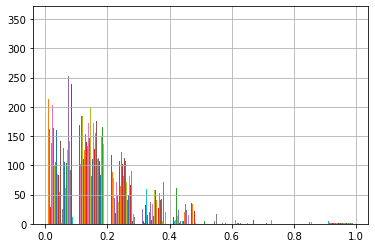

In [182]:
plt.hist(tweet_distance)
plt.grid()
plt.show()

In [183]:
def func(index, porog, matr):
    matr_sort = np.sort(-matr[index,:][matr[index,:] > porog]) #отсортированная матрица
    matr_index_sort = []
    for i in range(len(matr_sort)):
        matr_index_sort.append(np.where(-matr[index,:] == matr_sort[i])[0][0]) #отсортированные индексы матрицы
        
    for i in range(len(matr_index_sort)):
        print(df_valid.iloc[matr_index_sort[i]].tweet_text)
        print('-------------')

In [184]:
index = 14
porog = 0.5
matr = tweet_distance

In [185]:
func(index, porog, matr)

Popup Apple Store crew has been giving out water to the people in line but they are in street clothes. No Apple logos anywhere yet. #SXSW
-------------
Apple employees just showed up in force to the #SXSW PopUp Apple Store. #iPad2
-------------
